<a href="https://colab.research.google.com/github/LuisaPolicarpo/E-commerce-SQL-Business-Analysis/blob/main/E_commerce_SQL_Business_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Import libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [36]:
df = pd.read_excel('https://raw.githubusercontent.com/LuisaPolicarpo/E-commerce-SQL-Business-Analysis/main/Online%20Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [37]:
df.shape

(541909, 8)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [39]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [40]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [41]:
df.duplicated().sum()

np.int64(5268)

--- InvoiceNo ---


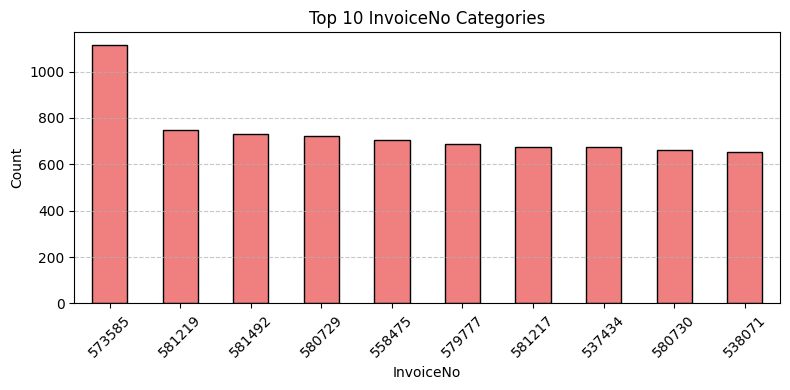

--- StockCode ---


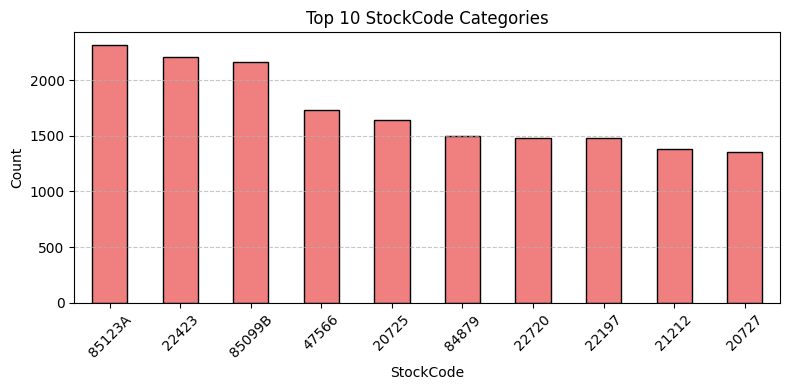

--- Description ---


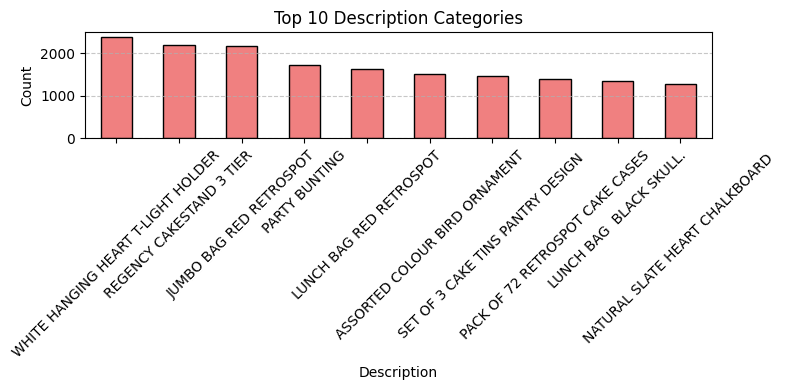

--- Quantity ---


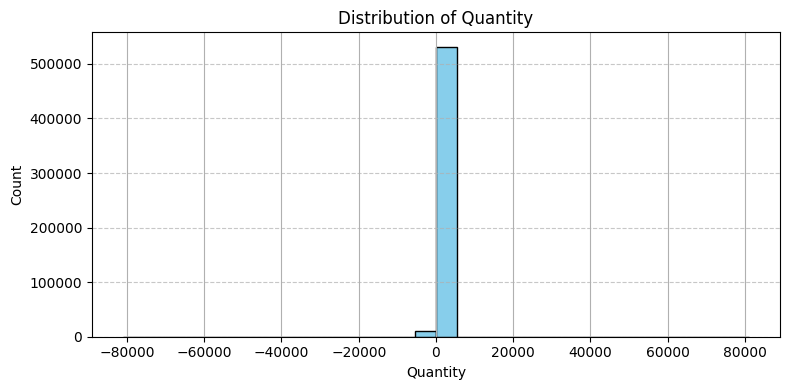

--- InvoiceDate ---


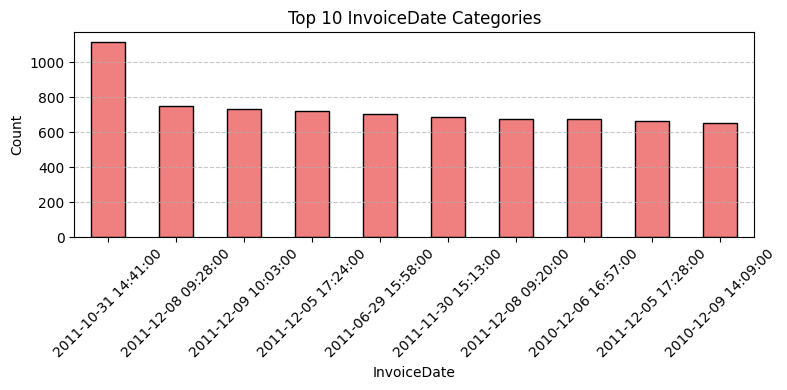

--- UnitPrice ---


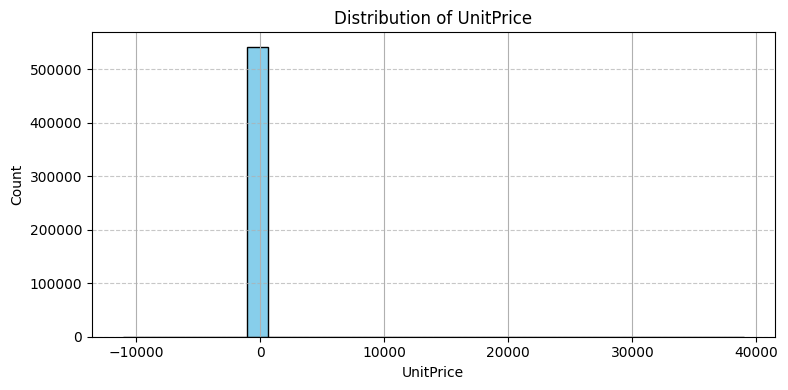

--- CustomerID ---


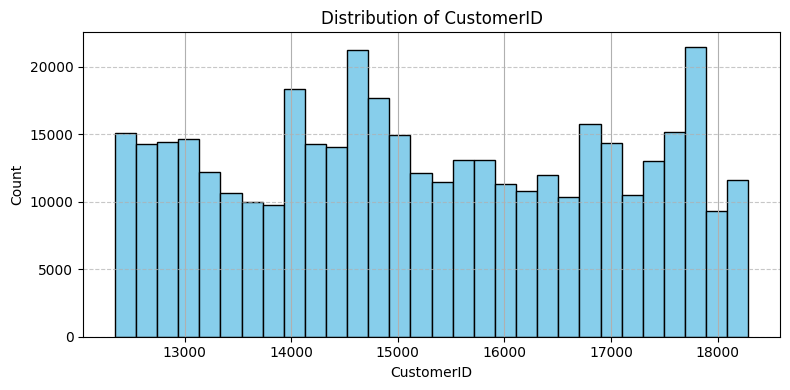

--- Country ---


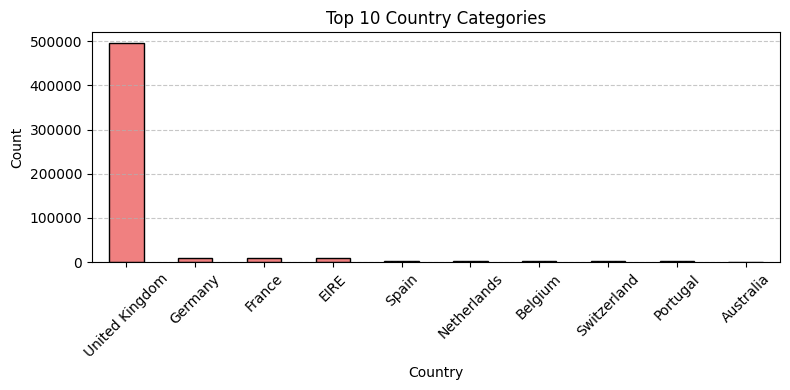

In [42]:
for column in df.columns:
        print(f"--- {column} ---")
        if pd.api.types.is_numeric_dtype(df[column]):
            # If it's a numeric column
            plt.figure(figsize=(8,4))
            df[column].hist(bins=30, color='skyblue', edgecolor='black')
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
        else:
            # If it's a categorical column
            plt.figure(figsize=(8,4))
            df[column].value_counts().head(10).plot(kind='bar', color='lightcoral', edgecolor='black')
            plt.title(f'Top 10 {column} Categories')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()

In [54]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


product_report = df.groupby('Description').agg(
    total_quantity = ('Quantity', 'sum'),
    total_revenue = ('TotalPrice', 'sum'),
    num_orders = ('InvoiceNo', 'nunique')
).reset_index()


product_report = product_report.sort_values(by='total_quantity', ascending=False)


product_report.head(10)



,Description,total_quantity,total_revenue,num_orders
4010,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847,13587.93,540
1867,JUMBO BAG RED RETROSPOT,47363,92356.03,2135
245,ASSORTED COLOUR BIRD ORNAMENT,36381,58959.73,1467
2741,POPCORN HOLDER,36334,33969.46,839
2396,PACK OF 72 RETROSPOT CAKE CASES,36039,21059.72,1334
3919,WHITE HANGING HEART T-LIGHT HOLDER,35317,99668.47,2302
2804,RABBIT NIGHT LIGHT,30680,66756.59,1009
2162,MINI PAINT SET VINTAGE,26437,16810.42,390
2362,PACK OF 12 LONDON TISSUES,26315,7972.76,515
2394,PACK OF 60 PINK PAISLEY CAKE CASES,24753,12189.47,875


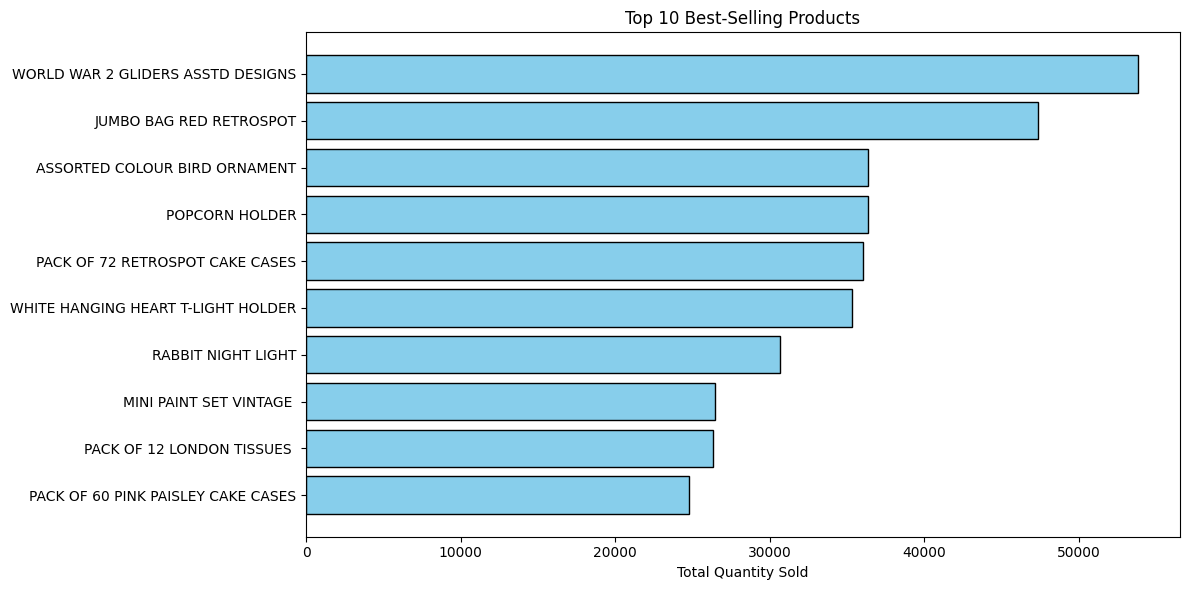

In [55]:
top10 = product_report.head(10)

plt.figure(figsize=(12,6))
plt.barh(top10['Description'], top10['total_quantity'], color='skyblue', edgecolor='black')
plt.xlabel('Total Quantity Sold')
plt.title('Top 10 Best-Selling Products')
plt.gca().invert_yaxis() # Best seller on top
plt.tight_layout()
plt.show()

In [56]:
# Connection to a new SQLite database (in memory)
conn = sqlite3.connect(':memory:')

# Load DataFrame into a new table
df.to_sql('hotel_bookings', conn, index=False, if_exists='replace')


OperationalError: duplicate column name: Product

In [ ]:
#Top 10 best-selling products


query_type = '''
SELECT hotel, COUNT(*) as total_bookings
FROM hotel_bookings
GROUP BY hotel
ORDER BY total_bookings DESC
'''

result = pd.read_sql_query(query_type, conn)
result